### **Lab6.ipynb**

#### Activity
- Data science - Laboratorio 6

#### Authors: 
- Diego Lemus
- Fabián Juárez


#### Date:
- 8 de Septiembre 2024


#### Repository:
- Link: https://github.com/FabianJuarez182/DS-LAB6


### Task 2 y 3

In [1]:
import pandas as pd
import re
from sklearn.feature_extraction.text import ENGLISH_STOP_WORDS
from collections import Counter
import string

# Cargar el archivo CSV
df = pd.read_csv('train.csv')

# Función para limpiar el texto
def clean_text(text):
    # Convertir a minúsculas
    text = text.lower()
    # Eliminar URLs
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    # Eliminar caracteres especiales y signos de puntuación
    text = re.sub(r'\@\w+|\#|\d+', '', text)  # Quitar hashtags, menciones, y números
    text = text.translate(str.maketrans('', '', string.punctuation))
    # Eliminar stopwords
    text = ' '.join([word for word in text.split() if word not in ENGLISH_STOP_WORDS])
    return text

# Aplicar la función de limpieza a la columna de texto
df['cleaned_text'] = df['text'].apply(clean_text)

# Separar en tweets de desastres y no desastres
disaster_tweets = df[df['target'] == 1]['cleaned_text']
non_disaster_tweets = df[df['target'] == 0]['cleaned_text']

# Calcular la frecuencia de las palabras
disaster_words = Counter(" ".join(disaster_tweets).split())
non_disaster_words = Counter(" ".join(non_disaster_tweets).split())


Descripción de forma detallada las actividades de preprocesamiento que llevó a cabo:

1. **Cargar el archivo CSV**:
   - Se carga el archivo CSV que contiene los datos de los tweets en un DataFrame de pandas.

2. **Función para limpiar el texto**:
  
   - **Convertir a minúsculas**: 
     Convierte todo el texto a minúsculas para asegurar la uniformidad y evitar diferencias entre palabras como "Desastre" y "desastre".

   - **Eliminar URLs**:
     Elimina cualquier URL presente en el texto, ya que estas no aportan valor al análisis de contenido.

   - **Eliminar caracteres especiales y signos de puntuación**:
     Elimina menciones, hashtags, números y signos de puntuación para limpiar el texto y enfocarse en las palabras relevantes.

   - **Eliminar stopwords**:
     Elimina palabras comunes (stopwords) que no aportan mucho significado, como "the", "and", "is", etc., utilizando una lista predefinida de stopwords en inglés.

3. **Aplicar la función de limpieza a la columna de texto**:
   - Aplica la función `clean_text` a cada tweet en la columna 'text' y guarda el resultado en una nueva columna 'cleaned_text'.

4. **Separar en tweets de desastres y no desastres**:
   - Divide los tweets en dos grupos: aquellos que son sobre desastres (`target` == 1) y aquellos que no lo son (`target` == 0).

5. **Calcular la frecuencia de las palabras**:
   - Cuenta la frecuencia de cada palabra en los tweets de desastres y no desastres utilizando la clase `Counter` de la biblioteca `collections`.

### Task 4

In [2]:
# Obtener las palabras más comunes en tweets de desastres
common_disaster_words = disaster_words.most_common(20)
# Obtener las palabras más comunes en tweets que no son de desastres
common_non_disaster_words = non_disaster_words.most_common(20)

# Mostrar resultados
print("Palabras más comunes en tweets de desastres:")
print(common_disaster_words)

print("\nPalabras más comunes en tweets que no son de desastres:")
print(common_non_disaster_words)

Palabras más comunes en tweets de desastres:
[('news', 138), ('disaster', 117), ('california', 111), ('suicide', 110), ('police', 107), ('amp', 107), ('people', 105), ('killed', 93), ('like', 92), ('pm', 89), ('hiroshima', 89), ('just', 86), ('fires', 85), ('storm', 85), ('crash', 84), ('families', 81), ('train', 79), ('emergency', 76), ('buildings', 75), ('bomb', 74)]

Palabras más comunes en tweets que no son de desastres:
[('like', 253), ('im', 243), ('just', 231), ('amp', 193), ('new', 168), ('dont', 141), ('body', 112), ('video', 96), ('people', 90), ('love', 89), ('know', 85), ('time', 84), ('got', 83), ('day', 81), ('emergency', 81), ('going', 75), ('want', 67), ('good', 67), ('think', 66), ('man', 62)]


1. **¿Qué palabras cree que le servirán para hacer un mejor modelo de clasificación?**

    Las palabras y frases que sean representativas de desastres, como “terremoto”, “inundación”, “evacuación”, “rescate”, “emergencia”, etc., serán más útiles para mejorar el modelo de clasificación. Sin embargo, también parecen contener muchas palabras y frases que no son particularmente informativas o relevantes para la clasificación de tweets de desastres; por ejemplo, “aa ayyo” y “aaaa ok” no aportan mucho contexto útil.


2. **¿Vale la pena explorar bigramas o trigramas para analizar contexto?**

    Sí, vale la pena explorar bigramas y trigramas para analizar el contexto, ya que pueden capturar relaciones entre palabras que las palabras individuales no pueden, mejorando así la precisión del modelo.

###  Task 5

In [3]:

# Exploración de bigramas y trigramas
from sklearn.feature_extraction.text import CountVectorizer

# Bigramas
bigram_vectorizer = CountVectorizer(ngram_range=(2, 2))
bigrams = bigram_vectorizer.fit_transform(df['cleaned_text'])
bigram_counts = Counter(bigram_vectorizer.get_feature_names_out())

# Trigramas
trigram_vectorizer = CountVectorizer(ngram_range=(3, 3))
trigrams = trigram_vectorizer.fit_transform(df['cleaned_text'])
trigram_counts = Counter(trigram_vectorizer.get_feature_names_out())

print("\nAlgunos bigramas comunes:")
print(bigram_counts.most_common(10))

print("\nAlgunos trigramas comunes:")
print(trigram_counts.most_common(10))


Algunos bigramas comunes:
[('aa ayyo', 1), ('aa batteries', 1), ('aa near', 1), ('aaaa ok', 1), ('aaaaaaallll ûªm', 1), ('aaaaaand theres', 1), ('aampb pipeliners', 1), ('aampw pmclose', 1), ('aan den', 1), ('aannnnd reddit', 1)]

Algunos trigramas comunes:
[('aa ayyo dei', 1), ('aa batteries swear', 1), ('aa near bings', 1), ('aaaa ok lemme', 1), ('aaaaaaallll ûªm season', 1), ('aaaaaand theres thunder', 1), ('aampw pmclose help', 1), ('aan den rijn', 1), ('aannnnd reddit quarantine', 1), ('aar ambulancewe decide', 1)]


### Task 5

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


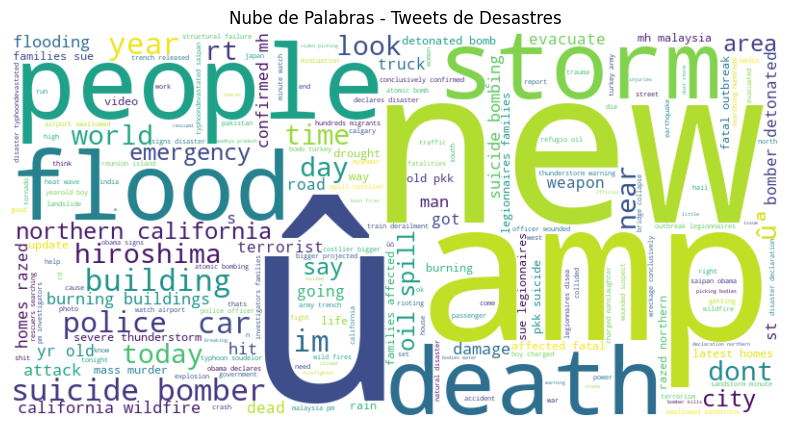

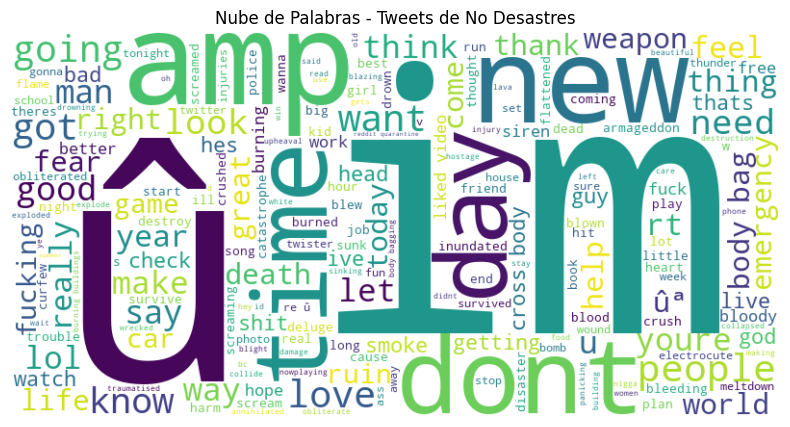

In [4]:
%pip install wordcloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt

# Función para crear y mostrar nubes de palabras
def create_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Generar nube de palabras para tweets de desastres
create_wordcloud(" ".join(disaster_tweets), "Nube de Palabras - Tweets de Desastres")

# Generar nube de palabras para tweets que no son de desastres
create_wordcloud(" ".join(non_disaster_tweets), "Nube de Palabras - Tweets de No Desastres")


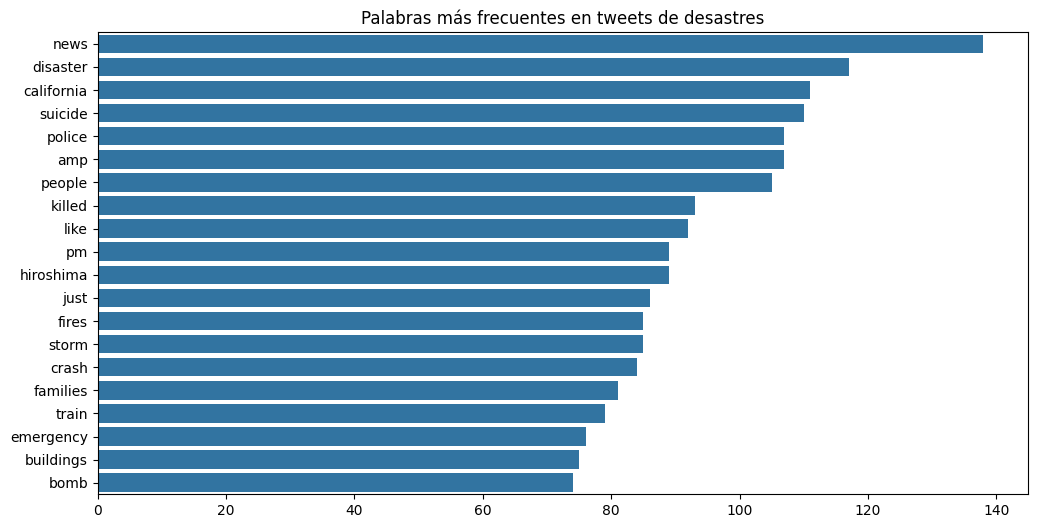

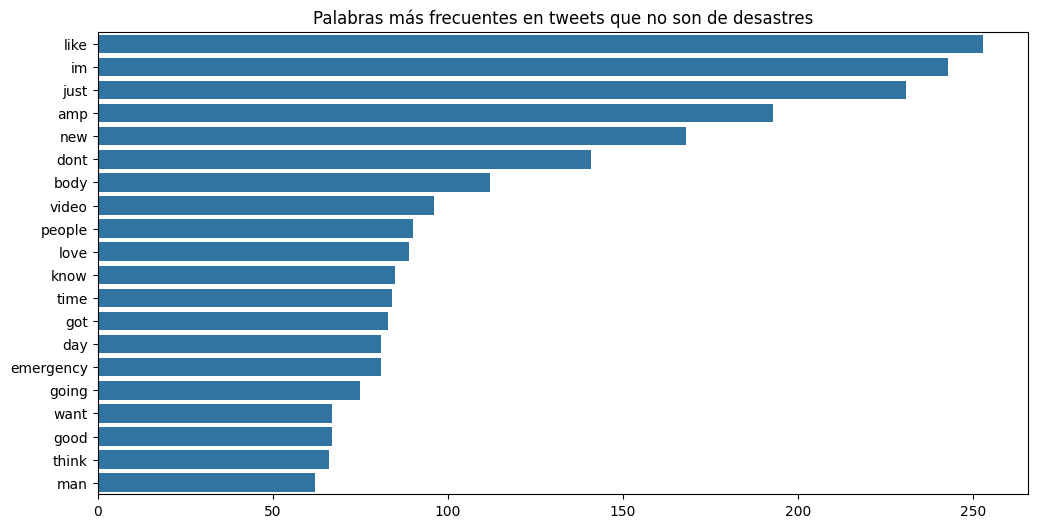

In [5]:
import seaborn as sns

# Función para crear un histograma de las palabras más frecuentes
def plot_word_frequencies(word_freq, title):
    words, counts = zip(*word_freq)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=list(counts), y=list(words))
    plt.title(title)
    plt.show()

# Histograma de las palabras más frecuentes en tweets de desastres
plot_word_frequencies(common_disaster_words, "Palabras más frecuentes en tweets de desastres")

# Histograma de las palabras más frecuentes en tweets que no son de desastres
plot_word_frequencies(common_non_disaster_words, "Palabras más frecuentes en tweets que no son de desastres")


In [6]:
# Bigramas más comunes
bigram_freq = bigrams.sum(axis=0)
bigram_freq = [(word, bigram_freq[0, idx]) for word, idx in bigram_vectorizer.vocabulary_.items()]
bigram_freq = sorted(bigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Trigramas más comunes
trigram_freq = trigrams.sum(axis=0)
trigram_freq = [(word, trigram_freq[0, idx]) for word, idx in trigram_vectorizer.vocabulary_.items()]
trigram_freq = sorted(trigram_freq, key=lambda x: x[1], reverse=True)[:10]

# Mostrar resultados
print("\nBigramas más comunes:")
print(bigram_freq)

print("\nTrigramas más comunes:")
print(trigram_freq)



Bigramas más comunes:
[('burning buildings', 60), ('suicide bomber', 59), ('liked video', 41), ('northern california', 41), ('cross body', 39), ('oil spill', 39), ('suicide bombing', 34), ('california wildfire', 34), ('looks like', 33), ('mass murder', 32)]

Trigramas más comunes:
[('suicide bomber detonated', 30), ('northern california wildfire', 29), ('latest homes razed', 28), ('homes razed northern', 28), ('pkk suicide bomber', 28), ('bomber detonated bomb', 28), ('razed northern california', 27), ('yr old pkk', 27), ('old pkk suicide', 27), ('families sue legionnaires', 26)]


In [7]:
# Palabras comunes entre tweets de desastres y no desastres
common_words = set(disaster_words.keys()).intersection(set(non_disaster_words.keys()))
print(f"Palabras comunes en ambas categorías: {common_words}")


Palabras comunes en ambas categorías: {'long', 'method', 'falcon', 'antonio', 'occurred', 'star', 'jonathan', 'biological', 'forecast', 'attacking', 'telling', 'scale', 'pits', 'skinny', 'brief', 'soviet', 'sleeping', 'wish', 'college', 'southampton', 'photography', 'club', 'insurers', 'believe', 'reflect', 'gif', 'pcs', 'philadelphia', 'destroyed', 'lions', 'stewart', 'matches', 'v', 'hero', 'exactly', 'closed', 'prison', 'scheme', 'atm', 'flooding', 'offs', 'band', 'mo', 'forgiven', 'vietnamese', 'attacks', 'factory', 'seattle', 'ahh', 'oak', 'population', 'concerns', 'richmond', 'specimens', 'plants', 'lying', 'troy', 'festival', 'emergency', 'coworker', 'loud', 'theyll', 'deliver', 'shell', 'corp', 'came', 'weather', 'christmas', 'm\x89û', 'half', 'ml', 'careless', 'ft', 'firefighters', 'santa', 'thrown', 'ppl', 'way', 'salmon', 'kept', 'fell', 'sanctions', 'blight', 'microphone', 'levels', 'replacing', 'purchased', 'special', 'structure', 'user', 'blake', 'detonate', 'democracy', 

### **Análisis Exploratorio**

#### Nubes de Palabras

1. **Tweets de Desastres**:
   - **Palabras prominentes**: "amp," "new," "death," "people," "storm," "flood," "building," y "suicide".
   - **Análisis**: Estas palabras indican que los tweets clasificados como desastres incluyen términos relacionados con fenómenos naturales ("storm," "flood"), pérdida de vidas ("death," "suicide"), y daño a la infraestructura ("building").

2. **Tweets de No Desastres**:
   - **Palabras prominentes**: "amp," "im," "dont," "people," "time," "new," "day," y "love".
   - **Análisis**: En esta nube, se observa un lenguaje más cotidiano y emocional, con palabras como "love," "day," "im," y "dont," que reflejan conversaciones normales y temas no asociados con desastres. La presencia de "amp" de nuevo sugiere que es un término que se encuentra comúnmente en tweets en general, no necesariamente relacionado con el contenido.

#### Análisis de las Palabras Más Frecuentes

3. **Tweets de desastres**:
   - **Palabras más frecuentes**: "news," "disaster," "california," "suicide," "police," "amp," "people," y "killed."
   - **Análisis**: Las palabras clave reflejan temas de eventos trágicos, especialmente "disaster," "suicide," "killed," y términos geográficos como "california," que podría estar asociado con desastres naturales o incidentes específicos en esa región.

4. **Tweets de no desastres**:
   - **Palabras más frecuentes**: "like," "im," "just," "amp," "new," "dont," "body," y "video."
   - **Análisis**: Las palabras en este conjunto son más genéricas y parecen estar relacionadas con experiencias personales o comentarios cotidianos ("like," "im," "just"), y actividades generales como "video" y "body."

#### Análisis de Bigramas y Trigramas

5. **Bigramas más comunes**:
   - **Bigramas** como "burning buildings," "suicide bomber," "liked video," "northern california," y "oil spill" aparecen con frecuencia.
   - **Análisis**: Estos bigramas sugieren que muchos tweets clasificados como desastres están relacionados con eventos dramáticos y específicos, como incendios ("burning buildings"), ataques ("suicide bomber"), y desastres ambientales ("oil spill").

6. **Trigramas más comunes**:
   - **Trigramas** como "suicide bomber detonated," "northern california wildfire," y "latest homes razed" aparecen con alta frecuencia.
   - **Análisis**: Estos trigramas profundizan en la naturaleza específica y alarmante de los tweets de desastres, describiendo no solo eventos sino también consecuencias inmediatas y detalles geográficos.

#### Palabras Comunes en Ambas Categorías

- **Palabras comunes entre tweets de desastres y no desastres**: Hay una amplia superposición en palabras como "unsafe," "charge," "targeted," y "crush," lo que sugiere que hay ciertos términos que, aunque se usan en ambos contextos, tienen significados diferentes dependiendo del contexto completo del tweet.

#### Conclusiones

- Los tweets de desastres tienden a estar llenos de palabras que reflejan eventos trágicos, como desastres naturales, ataques violentos y emergencias, mientras que los tweets que no son de desastres contienen un lenguaje más informal y cotidiano.
- La presencia de palabras comunes en ambas categorías, como "amp" y otras palabras generales, puede dificultar la tarea de los modelos de clasificación para distinguir claramente entre desastres y no desastres, especialmente si el contexto no está claro.

### Task 6

In [8]:
%pip install nltk
import nltk
from nltk.sentiment import SentimentIntensityAnalyzer

# Descargar el lexic�n de VADER
nltk.download('vader_lexicon')

# Inicializar el analizador de sentimiento VADER
sia = SentimentIntensityAnalyzer()

# Funci�n para obtener los puntajes de sentimiento con VADER
def get_vader_sentiment_scores(tweet):
    return sia.polarity_scores(tweet)

# Aplicar el an�lisis de sentimiento a cada tweet
df['vader_scores'] = df['text'].apply(get_vader_sentiment_scores)

# Extraer las puntuaciones de negatividad, neutralidad, positividad y compound
df['negativity_vader'] = df['vader_scores'].apply(lambda x: x['neg'])
df['neutrality_vader'] = df['vader_scores'].apply(lambda x: x['neu'])
df['positivity_vader'] = df['vader_scores'].apply(lambda x: x['pos'])
df['compound_vader'] = df['vader_scores'].apply(lambda x: x['compound'])

# Clasificar los tweets en positivo, negativo o neutral basado en el score compound
df['sentiment_vader'] = df['compound_vader'].apply(lambda x: 'Positive' if x > 0 else ('Negative' if x < 0 else 'Neutral'))

# Inicializar listas vac�as para los tweets
negative_tweets = []
positive_tweets = []
neutral_tweets = []

# Clasificar los tweets en las listas seg�n el sentimiento
for index, row in df.iterrows():
    if row['sentiment_vader'] == 'Negative':
        negative_tweets.append(row['text'])
    elif row['sentiment_vader'] == 'Positive':
        positive_tweets.append(row['text'])
    else:
        neutral_tweets.append(row['text'])

# Mostrar los resultados
print("Negative Tweets:", negative_tweets)
print("Positive Tweets:", positive_tweets)
print("Neutral Tweets:", neutral_tweets)

Defaulting to user installation because normal site-packages is not writeable
Note: you may need to restart the kernel to use updated packages.


[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\domot\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


Negative Tweets: ['Forest fire near La Ronge Sask. Canada', "All residents asked to 'shelter in place' are being notified by officers. No other evacuation or shelter in place orders are expected", '#RockyFire Update => California Hwy. 20 closed in both directions due to Lake County fire - #CAfire #wildfires', "I'm on top of the hill and I can see a fire in the woods...", "There's an emergency evacuation happening now in the building across the street", 'Three people died from the heat wave so far', "#raining #flooding #Florida #TampaBay #Tampa 18 or 19 days. I've lost count ", 'Damage to school bus on 80 in multi car crash #BREAKING ', 'Crying out for more! Set me ablaze', "@PhDSquares #mufc they've built so much hype around new acquisitions but I doubt they will set the EPL ablaze this season.", "on the outside you're ablaze and alive\r\nbut you're dead inside", 'How the West was burned: Thousands of wildfires ablaze in California alone http://t.co/vl5TBR3wbr', 'How the West was burne

### Task 7


In [9]:
# Task 7.1: Los 10 tweets m�s negativos basados en 'compound_vader'
top_10_negative_vader = df.nsmallest(10, 'compound_vader')[['text', 'compound_vader']]

# Task 7.2: Los 10 tweets m�s positivos basados en 'compound_vader'
top_10_positive_vader = df.nlargest(10, 'compound_vader')[['text', 'compound_vader']]

# Task 7.3: Si no tienes la columna 'category', podr�as utilizar alg�n otro criterio si es posible.
# Para este ejemplo, simplemente comparar� la negatividad promedio de todos los tweets negativos con los positivos.

# Calcular la negatividad promedio de los tweets negativos y positivos
avg_negativity_vader = df[df['compound_vader'] < 0]['compound_vader'].mean()
avg_positivity_vader = df[df['compound_vader'] > 0]['compound_vader'].mean()

# Imprimir resultados
print("Top 10 Tweets más Negativos:")
print(top_10_negative_vader)

print("\nTop 10 Tweets más Positivos:")
print(top_10_positive_vader)

print("\nNegatividad Promedio de los Tweets Negativos:", avg_negativity_vader)
print("Positividad Promedio de los Tweets Positivos:", avg_positivity_vader)


Top 10 Tweets más Negativos:
                                                   text  compound_vader
7472  wreck? wreck wreck wreck wreck wreck wreck wre...         -0.9883
6414  @Abu_Baraa1 Suicide bomber targets Saudi mosqu...         -0.9686
6411  Suicide bomber kills 15 in Saudi security site...         -0.9623
6393  ? 19th Day Since 17-Jul-2015 -- Nigeria: Suici...         -0.9595
6407  17 killed in SÛªArabia mosque suicide bombing...         -0.9552
2932  at the lake \r\n*sees a dead fish*\r\nme: poor...         -0.9549
472   illegal alien released by Obama/DHS 4 times Ch...         -0.9538
1540  Bomb Crash Loot Riot Emergency Pipe Bomb Nucle...         -0.9524
6818  Bomb head? Explosive decisions dat produced mo...         -0.9500
6930  @cspan #Prez. Mr. President you are the bigges...         -0.9493

Top 10 Tweets más Positivos:
                                                   text  compound_vader
6992  Check out 'Want Twister Tickets AND A VIP EXPE...          0.9730
6534 

### Task 8